# SENTIMENT ANALYSIS TO DETERMINE THE EFFECT OF TWEETS ON STOCK SHARES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [2]:
cmpy_df = pd.read_csv('Company.csv')
cmpy_tweet_df = pd.read_csv('Company_Tweet.csv')
tweet_df = pd.read_csv('Tweet.csv')

In [3]:
cmpy_df.head()

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [4]:
cmpy_tweet_df.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [5]:
cmpy_tweet_df.describe()

,tweet_id
count,4.336445e+06
mean,8.834282e+17
std,1.927735e+17
min,5.504415e+17
25%,7.185450e+17
50%,8.825934e+17
75%,1.054776e+18
max,1.212160e+18


In [6]:
tweet_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [7]:
tweet_df.describe()

,tweet_id,post_date,comment_num,retweet_num,like_num
count,3.717964e+06,3.717964e+06,3.717964e+06,3.717964e+06,3.717964e+06
mean,8.797444e+17,1.498582e+09,3.123642e-01,6.214807e-01,2.219982e+00
std,1.924039e+17,4.587266e+07,1.966064e+00,7.009571e+00,1.429093e+01
min,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.169886e+17,1.459778e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.743180e+17,1.497289e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.050771e+18,1.539358e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


In [8]:
tweets_on_cmpny = pd.merge(tweet_df,cmpy_tweet_df,on='tweet_id',how='inner')
tweets_on_cmpny.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [16]:
tweets_on_cmpny.to_csv("CompanyTweets_Merged.csv")

In [17]:
tweets_on_cmpny['post_date'] = pd.to_datetime(tweets_on_cmpny['post_date'], unit='s')

In [18]:
tweets_on_cmpny['date'] = pd.to_datetime(tweets_on_cmpny['post_date'].apply(lambda date: date.date()))

In [19]:
tweets_on_cmpny['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [20]:
tweets_on_cmpny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   writer         object        
 1   post_date      datetime64[ns]
 2   body           object        
 3   comment_num    int64         
 4   retweet_num    int64         
 5   like_num       int64         
 6   ticker_symbol  object        
 7   date           datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 297.8+ MB


In [25]:
#redundant
#tweets_on_cmpny = tweets_on_cmpny.drop(['tweet_id'],axis=1)
tweets_on_cmpny.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [23]:
tweets_on_cmpny.isna().sum()

writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [24]:
tweets_on_cmpny.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [26]:
aapl = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'AAPL']
tsla = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'TSLA']
amzn = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'AMZN']
msft = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'MSFT']
goog = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'GOOG']
googl = tweets_on_cmpny[tweets_on_cmpny['ticker_symbol'] == 'GOOGL']

In [27]:
!pip install yfinance

In [28]:
import yfinance as yf

In [29]:
tsla_stock = yf.Ticker('TSLA')

In [30]:
start = min(tsla['date'])
end = max(tsla['date'])

tsla_stock = tsla_stock.history(start=start.date(), end=end.date())

In [31]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0
2015-01-08,42.562000,42.759998,42.001999,42.124001,17212500,0,0
...,...,...,...,...,...,...,...
2019-12-23,82.356003,84.402000,82.000000,83.844002,66598000,0,0
2019-12-24,83.671997,85.094002,82.538002,85.050003,40273500,0,0
2019-12-26,85.582001,86.695999,85.269997,86.188004,53169500,0,0


In [32]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [33]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-33-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


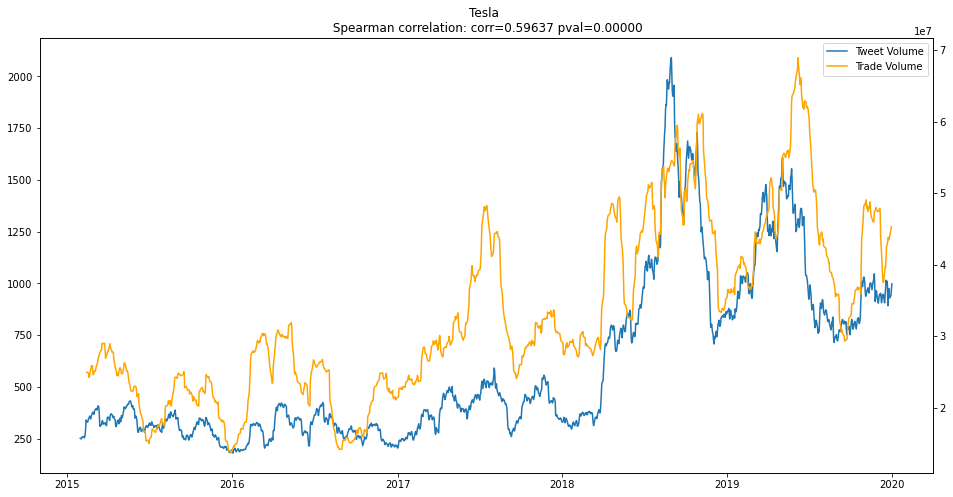

In [34]:
tweet_vol_affect(tsla,tsla_stock,"Tesla") 

<ipython-input-33-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


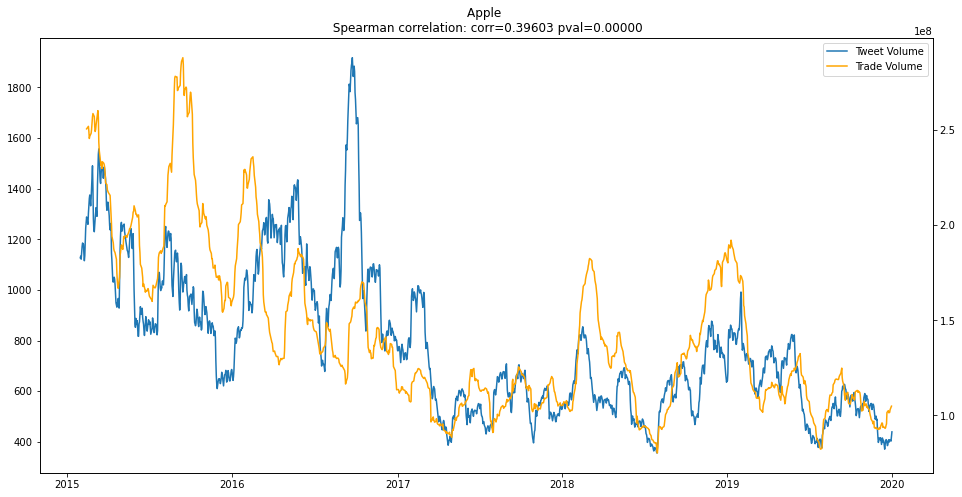

In [35]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

<ipython-input-33-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


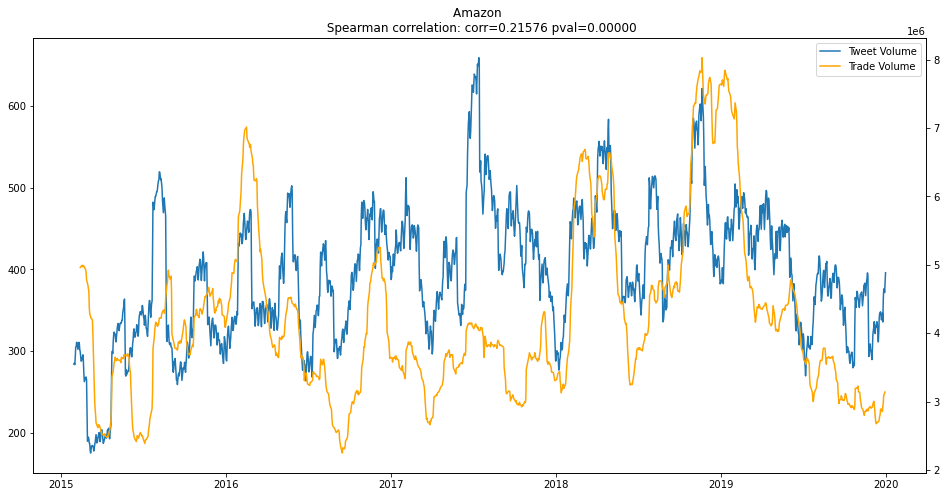

In [36]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

<ipython-input-33-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


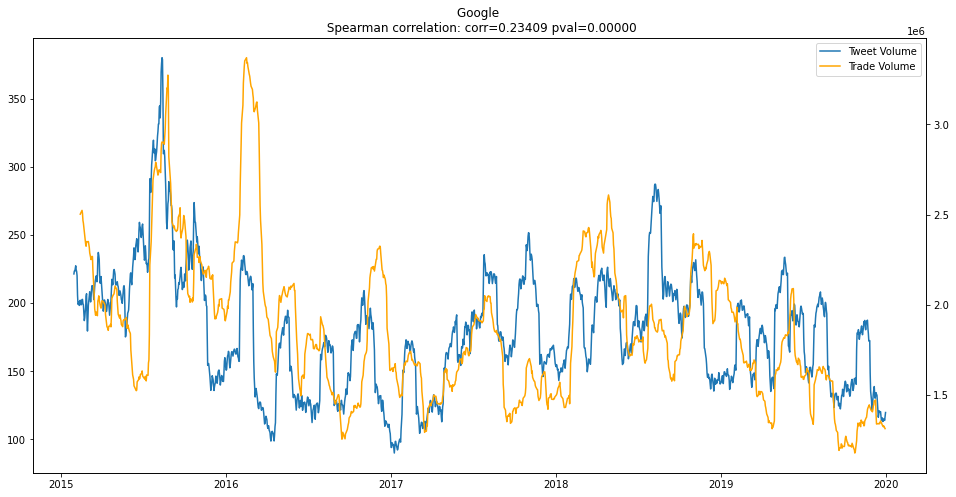

In [37]:
tweet_vol_affect(googl,googl_stock,"Google")

<ipython-input-33-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


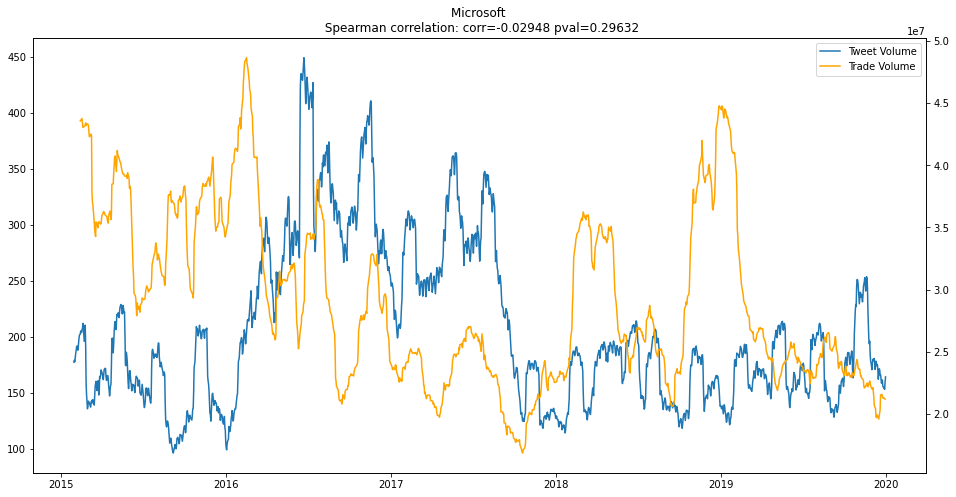

In [38]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

## Classifying positive and negative tweets

In [41]:
!pip install afinn

     |████████████████████████████████| 52 kB 507 kB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=7f04f90ae9d0e5af97564f6fcbdbf378f56e95051033a1189698dbbcb6a49f5f
  Stored in directory: /Users/jkakafua/Library/Caches/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [40]:
from afinn import Afinn
afinn = Afinn()

In [41]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-41-0493c20c1d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-41-0493c20c1d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-41-0493c20c1d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [56]:
googl.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,score
30,UPBOptionMil,2015-01-01 00:26:44,2014 The Year in Review (Part II - THE END) ht...,0,2,2,GOOGL,2015-01-01,0.0
59,t_nathan95,2015-01-01 01:20:36,Prediction: $TWTR $GRPN $YELP are acquired as ...,0,0,1,GOOGL,2015-01-01,3.0
62,t_nathan95,2015-01-01 01:25:02,Prediction: PayPal post-spinoff and $PAY are n...,0,0,0,GOOGL,2015-01-01,-3.0
72,PBratbyOfficial,2015-01-01 01:40:14,Trailing Stop taken out on my $GOOGL #trade ta...,0,0,0,GOOGL,2015-01-01,1.0
87,SentiQuant,2015-01-01 01:59:47,#SENTISHIFTUP $X $T $GOOGL $AMRN $UPIP $CNAT $...,0,0,0,GOOGL,2015-01-01,0.0


In [66]:
#Split tsla into pos/neg scoring
#tslapos = #tsla where value is pos
#tslaneg = #tsla where value is neg

#Function: splits pd dataframe into two csvs
#Feed one df and one stringname for the new function to use
def split_by_sentiment(nextdf,newname):
    #pos = chart #where positive
    #neg = chart #where negative
    #come up with string to feed into exec command
    command = (str(newname)+"_pos = "+str(nextdf)+".loc["+str(nextdf)+"['score'] > 0]")
#    print(command)
    exec(command)
    #same but negative
    command = (str(newname)+"_neg = "+str(nextdf)+".loc["+str(nextdf)+"['score'] < 0]")
#   print(command)
    exec(command)

#split_by_sentiment(next,"newname")

In [72]:
#Run split function for every chart

tsla_pos = tsla.loc[tsla['score']>0]
tsla_neg = tsla.loc[tsla['score']<0]

aapl_pos = aapl.loc[aapl['score']>0]
aapl_neg = aapl.loc[aapl['score']<0]

amzn_pos = amzn.loc[amzn['score']>0]
amzn_neg = amzn.loc[amzn['score']<0]

msft_pos = msft.loc[msft['score']>0]
msft_neg = msft.loc[msft['score']<0]

googl_pos = googl.loc[googl['score']>0]
googl_neg = googl.loc[googl['score']<0]

#split_by_sentiment(tsla,"tsla")
#split_by_sentiment(aapl,"aapl")
#split_by_sentiment(amzn,"amzn")
#split_by_sentiment(msft,"msft")
#split_by_sentiment(googl,"googl")

In [71]:
tsla_pos.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,score
28,JorelLaraKalel,2015-01-01 00:26:09,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,TSLA,2015-01-01,2.0
81,caroltheva,2015-01-01 01:46:04,Free Iron condor setup course http://bit.ly/Ir...,0,0,0,TSLA,2015-01-01,1.0
83,optionsangre,2015-01-01 01:51:21,top trades (my acct) 2014 - $PCYC $NFLX $FB $T...,0,0,2,TSLA,2015-01-01,2.0
94,BargainTrapper,2015-01-01 02:09:00,http://goo.gl/efUF0i <--- Amazing subscriber ...,0,0,0,TSLA,2015-01-01,6.0
112,caroltheva,2015-01-01 02:34:52,Free course - Capital usage with Options http:...,0,0,0,TSLA,2015-01-01,1.0


In [74]:
tsla_pos['score'].to_csv('Stored results breakdown/tsla_pos_score.csv')
tsla_neg['score'].to_csv('Stored results breakdown/tsla_neg_score.csv')

aapl_pos['score'].to_csv('Stored results breakdown/aapl_pos_score.csv')
aapl_neg['score'].to_csv('Stored results breakdown/aapl_neg_score.csv')

amzn_pos['score'].to_csv('Stored results breakdown/amzn_pos_score.csv')
amzn_neg['score'].to_csv('Stored results breakdown/amzn_neg_score.csv')

msft_pos['score'].to_csv('Stored results breakdown/msft_pos_score.csv')
msft_neg['score'].to_csv('Stored results breakdown/msft_neg_score.csv')

googl_pos['score'].to_csv('Stored results breakdown/googl_pos_score.csv')
googl_neg['score'].to_csv('Stored results breakdown/googl_neg_score.csv')

In [42]:
tsla['score'].to_csv('Stored results/tsla_score.csv')

In [43]:
aapl['score'].to_csv('Stored results/aapl_score.csv')

In [44]:
amzn['score'].to_csv('Stored results/amzn_score.csv')

In [45]:
msft['score'].to_csv('Stored results/msft_score.csv')

In [46]:
googl['score'].to_csv('Stored results/googl_score.csv')

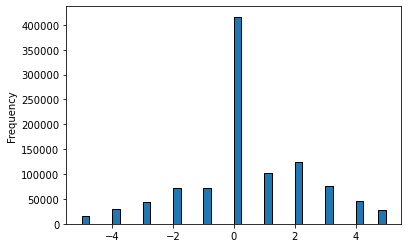

In [47]:
tsla.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

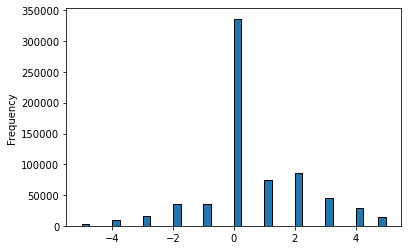

In [48]:
amzn.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

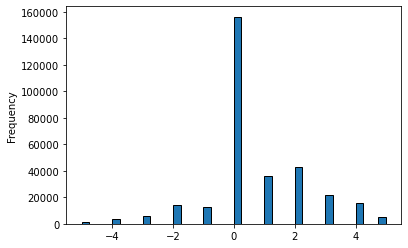

In [49]:
googl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

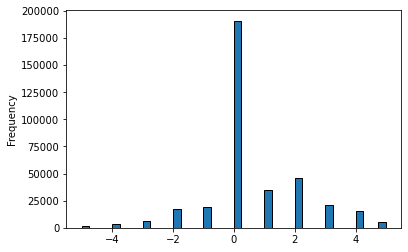

In [50]:
msft.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [131]:
tsla_neg.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,score
47,caroltheva,2015-01-01 00:56:41,Sneaky techniques for an Options trading edge ...,0,0,0,TSLA,2015-01-01,1.0
54,petergo99037185,2015-01-01 01:10:37,"YR %, /-, $TSLA 47.85%, $FB 42.77%, $TWTR -...",0,0,0,TSLA,2015-01-01,1.0
122,paulchertyk,2015-01-01 03:16:25,$tsla $scty Just gotta wait and be patient wit...,0,0,0,TSLA,2015-01-01,3.0
172,jrs101780,2015-01-01 05:04:36,@davenathan I just expected something more ext...,1,0,0,TSLA,2015-01-01,5.0
176,bobcatturner,2015-01-01 05:08:23,If At-Risk Companies Made New Year's Resolutio...,0,0,0,TSLA,2015-01-01,2.0


In [130]:
tsla_neg['score']=tsla_neg['score']*-1
aapl_neg['score']=aapl_neg['score']*-1
amzn_neg['score']=amzn_neg['score']*-1
msft_neg['score']=msft_neg['score']*-1
googl_neg['score']=googl_neg['score']*-1

<ipython-input-130-4a446b9a0fdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_neg['score']=tsla_neg['score']*-1
<ipython-input-130-4a446b9a0fdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_neg['score']=aapl_neg['score']*-1
<ipython-input-130-4a446b9a0fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [151]:
def sentiment_overtime(tweets,stock,title,negativetweets=None):
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    corr_test = tweets.groupby('date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()

    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
#    ax3 = fig.add_subplot
#    ax3 = ax1.twinx()
    
    ax1.plot(visual.index,visual,color='blue',label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='Share Price')
#    ax3.plot(visual.index,negativetweets["score"]*-1,color='red',label='Tweets Sentiment')
    
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
  #  lines3,labels3=ax3.get_legend_handles_labels()
    #elif negativetweets is None:
    #    lines3,labels3=0
    #ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    figname = './Charts/'+str(title)+'_sentiment.png'
    fig.savefig(figname)

<ipython-input-142-1aa353b2a684>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


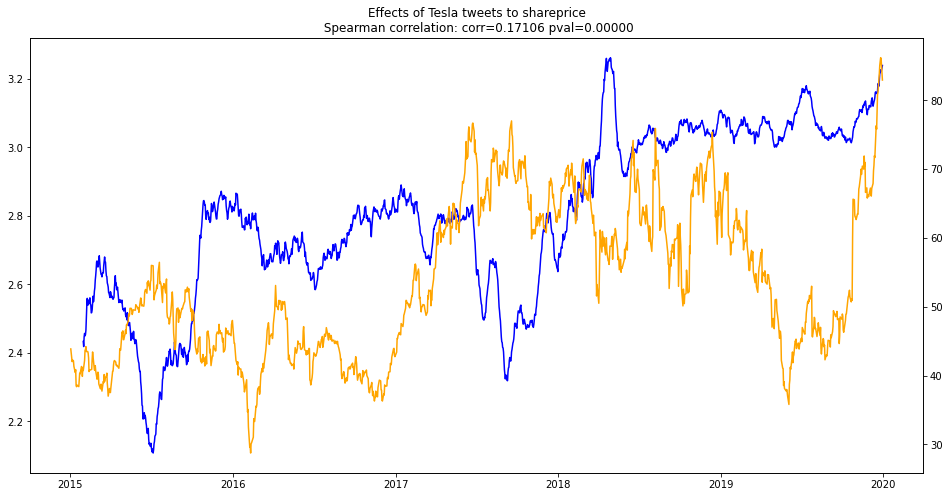

In [143]:
sentiment_overtime(tsla_agg,tsla_stock,"Tesla General",tsla_neg)
#tsla_neg.head()

In [ ]:
sentiment_overtime(tsla_pos,tsla_stock,"Tesla",tsla_neg)

<ipython-input-137-09371986281e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


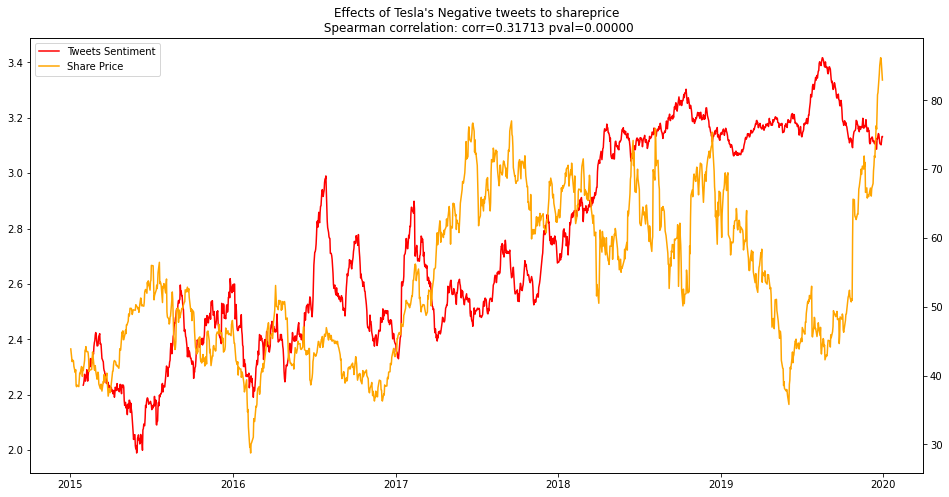

In [138]:
sentiment_overtime(tsla_neg,tsla_stock,"Tesla's Negative")

<ipython-input-48-dc614271297f>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


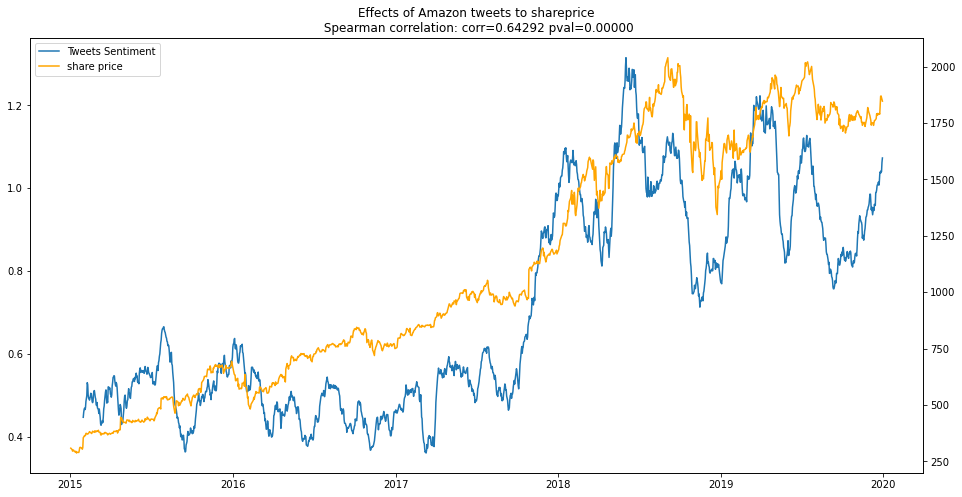

In [50]:
sentiment_overtime(amzn,amzn_stock,"Amazon");

<ipython-input-142-1aa353b2a684>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


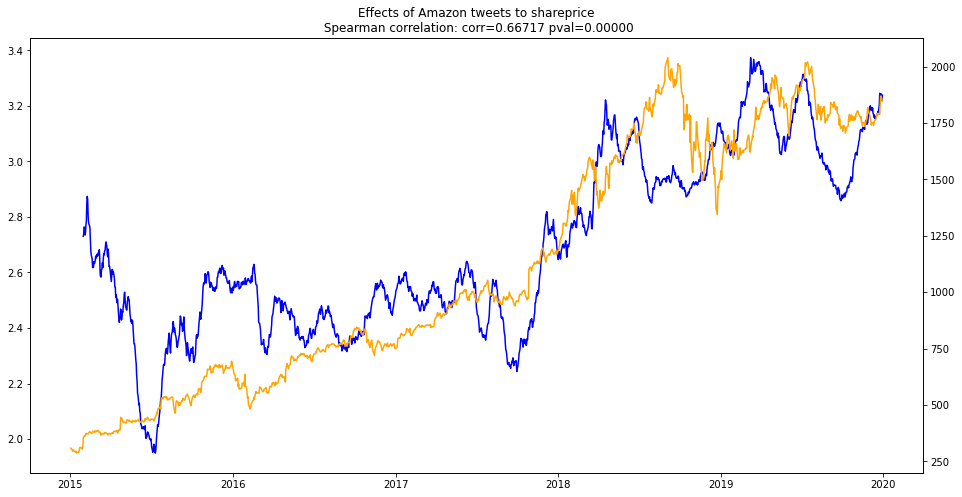

In [144]:
sentiment_overtime(amzn_pos,amzn_stock,"Amazon");

<ipython-input-137-09371986281e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


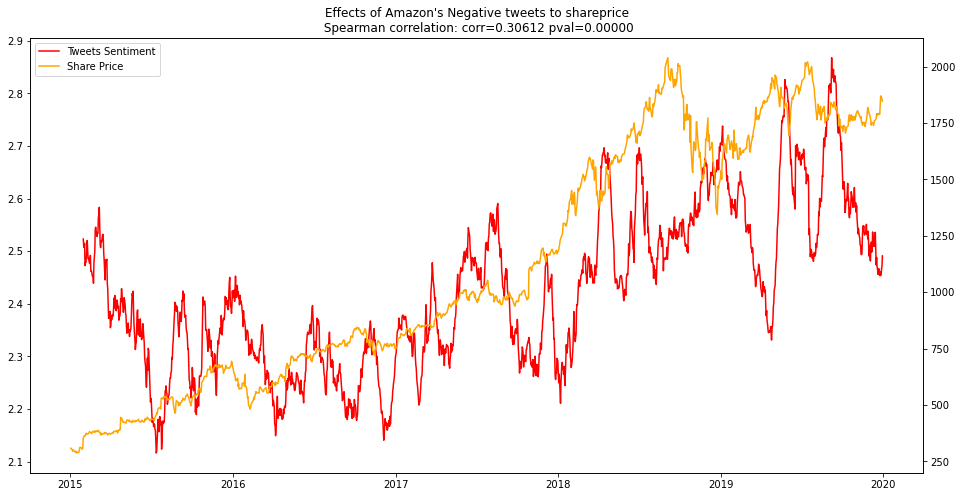

In [139]:
sentiment_overtime(amzn_neg,amzn_stock,"Amazon's Negative");

<ipython-input-151-1aa353b2a684>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


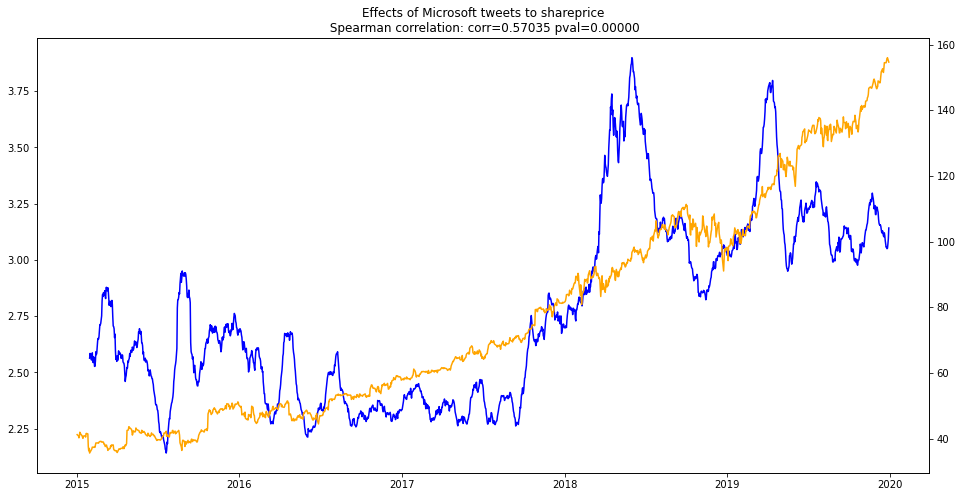

In [152]:
sentiment_overtime(msft_pos,msft_stock,"Microsoft");

<ipython-input-148-13c4577e1e10>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


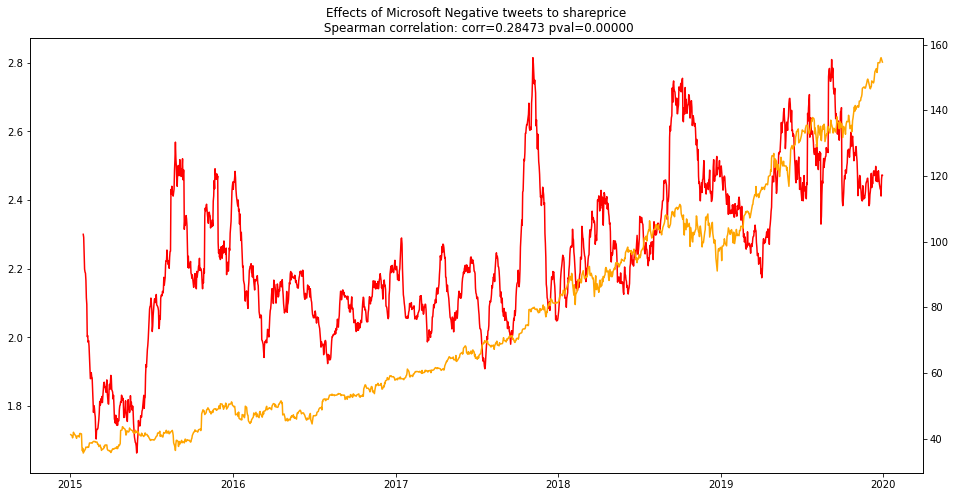

In [150]:
sentiment_overtime(msft_neg,msft_stock,"Microsoft Negative");

<ipython-input-48-dc614271297f>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


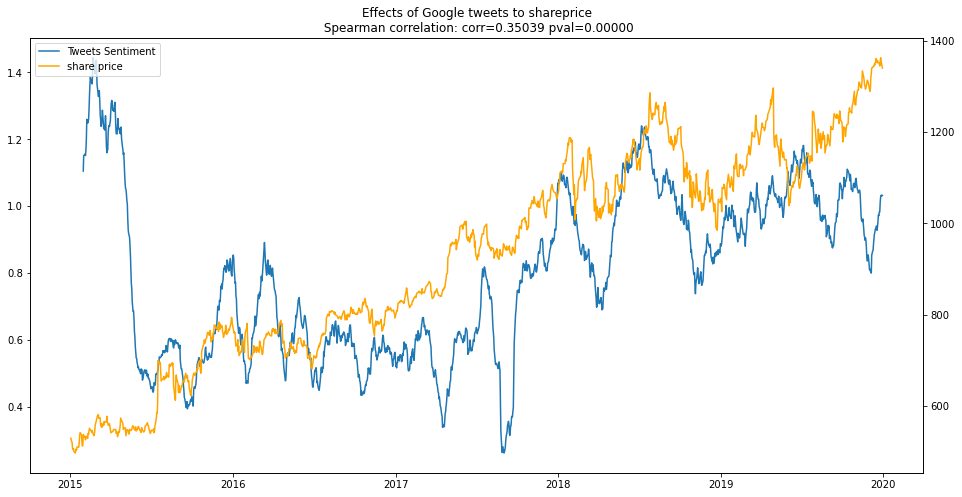

In [52]:
sentiment_overtime(googl,googl_stock,"Google");

<ipython-input-142-1aa353b2a684>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


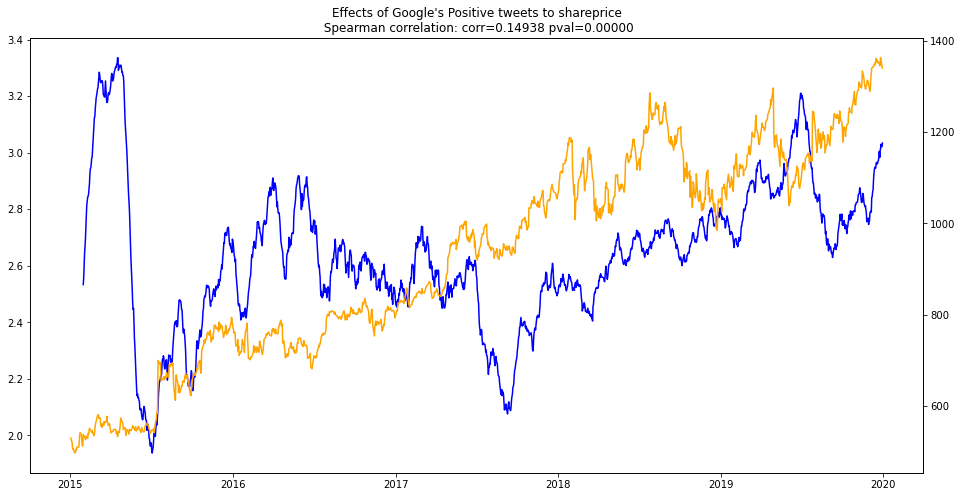

In [145]:
sentiment_overtime(googl_pos,googl_stock,"Google's Positive");


<ipython-input-137-09371986281e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


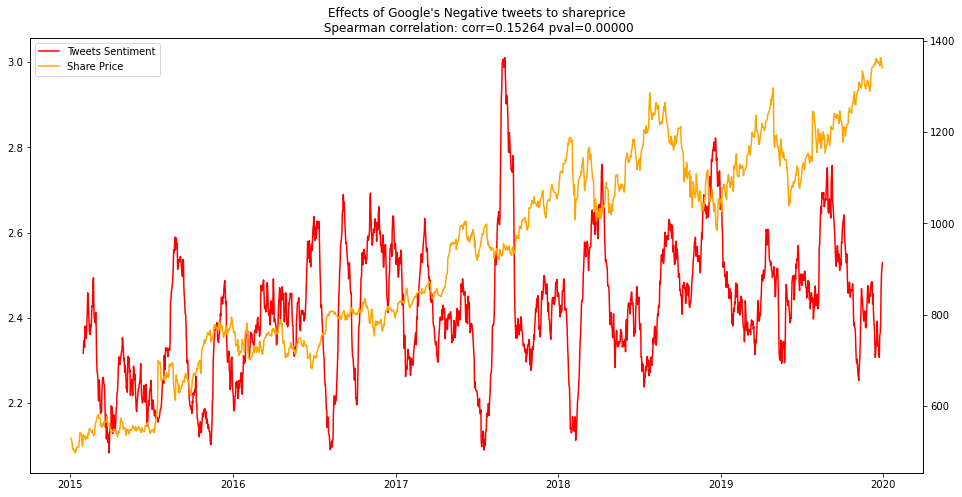

In [140]:
sentiment_overtime(googl_neg,googl_stock,"Google's Negative");

<ipython-input-93-489d93687298>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


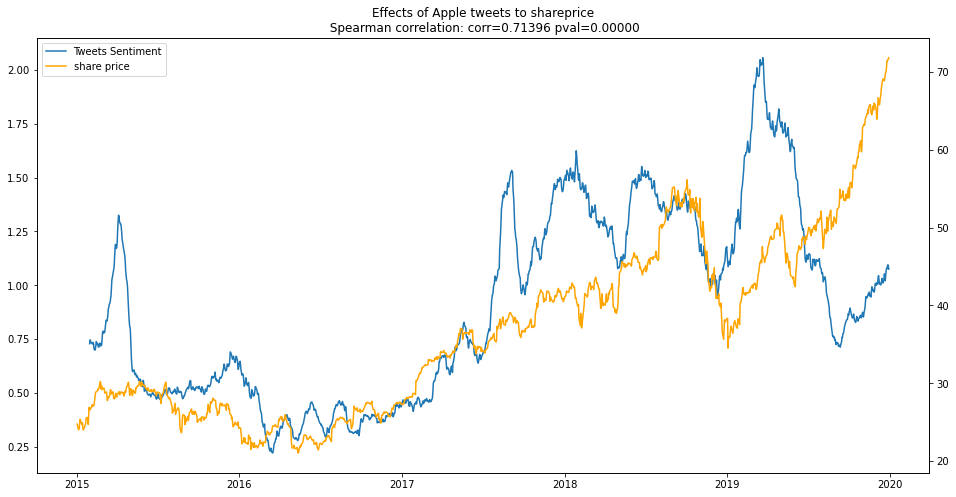

In [101]:
sentiment_overtime(aapl,aapl_stock,"Apple");

<ipython-input-142-1aa353b2a684>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


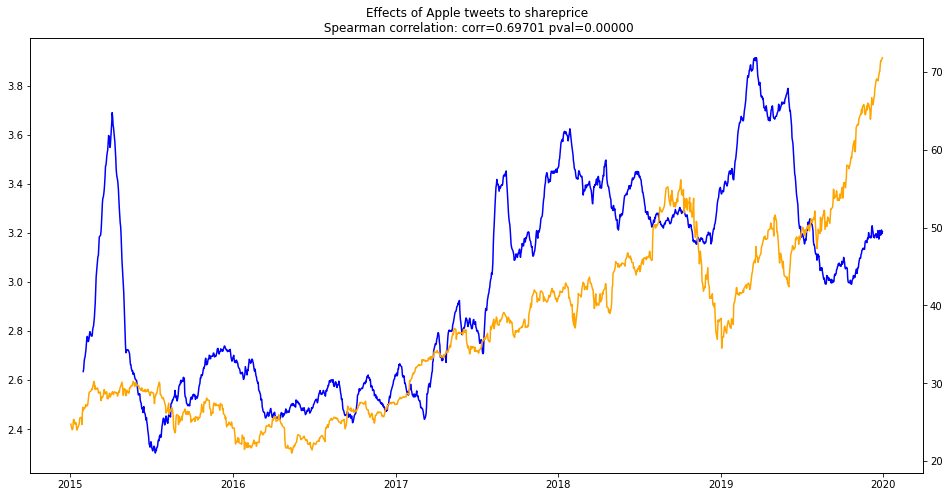

In [146]:
sentiment_overtime(aapl_pos,aapl_stock,"Apple");

<ipython-input-137-09371986281e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


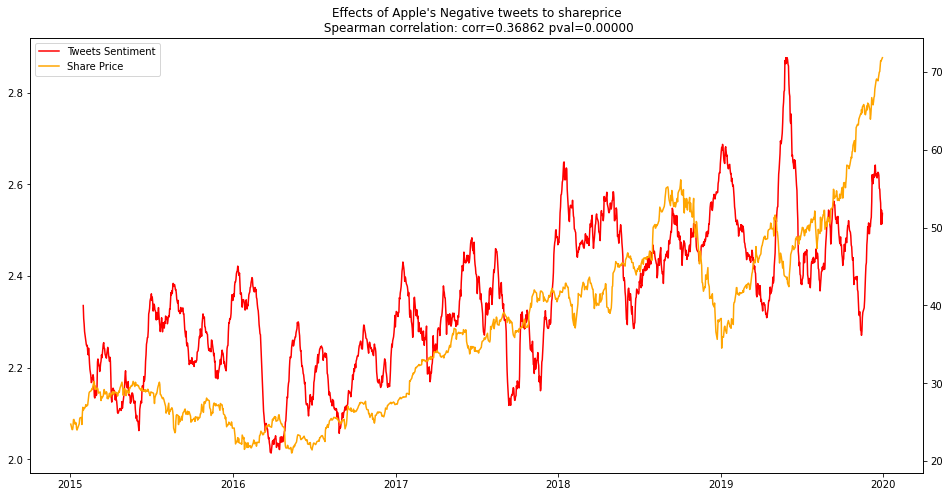

In [141]:
aapl_negative = sentiment_overtime(aapl_neg,aapl_stock,"Apple's Negative");